# Exploratory data analysis for vtalks.net

## Table of contents:

* [Introduction](#introduction)
    * [Setup & Configuration](#setup-and-configuration)
    * [Load the Data Set](#load-the-data-set)
    
* [Youtube Statistics Analysis](#youtube-statistics-analysis)
    * [Youtube Views](#youtube-views)
    * [Youtube Likes](#youtube-likes)
    * [Youtube Dislikes](#youtube-dislikes)
    * [Youtube Favorites](#youtube-favorites)
    
* [Statistics Analysis](#statistics-analysis)
    * [Views](#views)
    * [Likes](#likes)
    * [Dislikes](#dislikes)
    * [Favorites](#favorites)
    
* [Youtube Statistics Histograms](#youtube-statistics-histograms)
    * [Youtube Views Histogram](#youtube-views-histogram)
    * [Youtube Likes Histogram](#youtube-likes-histogram)
    * [Youtube Dislikes Histogram](#youtube-dislikes-histogram)
    * [Youtube Favorites Histogram](#youtube-favorites-histogram)
    
* [Statistics Histograms](#statistics-histograms)
    * [Views Histogram](#views-histogram)
    * [Likes Histogram](#likes-histogram)
    * [Dislikes Histogram](#dislikes-histogram)
    * [Favorites Histogram](#favorites-histogram)

## Introduction <a class="anchor" id="introduction"></a>

This jupyter network describes an exploratory data analysis for a data set of talks published on [vtalks.net](http://www.vtalks.net) website.

We are going to use numpy and pandas to load and analyze our dataset, and we will use matplotlib python libraries for
plotting the results.

In [94]:
!pwd

/Users/raul/Projects/vtalks/jupyter/2017


### Setup & Configuration <a class="anchor" id="setup-and-configuration"></a>

In [95]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn

Now we configure matplotlib to ensure we have somne pretty plots :)

In [96]:
%matplotlib inline

seaborn.set()
plt.rc('figure', figsize=(16,8))
plt.style.use('bmh')

plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

### Load the Data Set <a class="anchor" id="load-the-dataset"></a>

And finally load our dataset. Notice that there are different data sets available.

The first one is a general data set with all the information available from the start (around mid 2010) until now. Then there are the same data sets but splitted by year.

In [97]:
# data_source = "../../.dataset/vtalks_dataset_2018.csv"
data_source = "../../.dataset/vtalks_dataset_2017.csv"
# data_source = "../../.dataset/vtalks_dataset_2016.csv"
# data_source = "../../.dataset/vtalks_dataset_2015.csv"
# data_source = "../../.dataset/vtalks_dataset_2014.csv"
# data_source = "../../.dataset/vtalks_dataset_2013.csv"
# data_source = "../../.dataset/vtalks_dataset_2012.csv"
# data_source = "../../.dataset/vtalks_dataset_2011.csv"
# data_source = "../../.dataset/vtalks_dataset_2010.csv"
# data_source = "../../.dataset/vtalks_dataset_all.csv"

data_set = pd.read_csv(
    data_source,
    parse_dates=[1],
    dtype={
        'id': int,
        'youtube_view_count': int, 
        'youtube_like_count': int,
        'youtube_dislike_count': int,
        'youtube_favorite_count': int,
        'view_count': int, 
        'like_count': int,
        'dislike_count': int,
        'favorite_count': int,
    })

In [98]:
data_set.dtypes

id                                 int64
created                   datetime64[ns]
youtube_view_count                 int64
youtube_like_count                 int64
youtube_dislike_count              int64
youtube_favorite_count             int64
view_count                         int64
like_count                         int64
dislike_count                      int64
favorite_count                     int64
dtype: object

In [99]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 10 columns):
id                        4954 non-null int64
created                   4954 non-null datetime64[ns]
youtube_view_count        4954 non-null int64
youtube_like_count        4954 non-null int64
youtube_dislike_count     4954 non-null int64
youtube_favorite_count    4954 non-null int64
view_count                4954 non-null int64
like_count                4954 non-null int64
dislike_count             4954 non-null int64
favorite_count            4954 non-null int64
dtypes: datetime64[ns](1), int64(9)
memory usage: 387.1 KB


In [100]:
data_set.head()

,id,created,youtube_view_count,youtube_like_count,youtube_dislike_count,youtube_favorite_count,view_count,like_count,dislike_count,favorite_count
0,16243,2017-12-28 00:02:02,371,9,0,0,9,0,0,0
1,552,2017-12-22 01:49:42,588,6,0,0,107,0,0,0
2,551,2017-12-22 01:49:22,619,8,0,0,103,0,0,0
3,550,2017-12-22 01:49:01,329,5,0,0,107,0,0,0
4,549,2017-12-22 01:48:33,765,13,2,0,62,0,0,0


In [101]:
data_set.describe()

,id,youtube_view_count,youtube_like_count,youtube_dislike_count,youtube_favorite_count,view_count,like_count,dislike_count,favorite_count
count,4954.000000,4.954000e+03,4954.000000,4954.000000,4954.0,4954.000000,4954.000000,4954.000000,4954.000000
mean,8520.422285,4.025551e+03,50.384941,2.952160,0.0,15.756964,0.001817,0.000404,0.001009
std,5885.866819,4.368997e+04,419.900709,58.493327,0.0,14.275571,0.042588,0.020091,0.031756
min,1.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,3048.250000,2.440000e+02,2.000000,0.000000,0.0,8.000000,0.000000,0.000000,0.000000
50%,7562.500000,6.845000e+02,8.000000,0.000000,0.0,11.000000,0.000000,0.000000,0.000000
75%,14621.750000,2.181750e+03,26.000000,2.000000,0.0,17.000000,0.000000,0.000000,0.000000
max,17791.000000,2.929460e+06,27165.000000,4066.000000,0.0,148.000000,1.000000,1.000000,1.000000


In [102]:
pp.ProfileReport(data_set)

Number of variables,10
Number of observations,4954
Total Missing (%),0.0%
Total size in memory,387.1 KiB
Average record size in memory,80.0 B
Numeric,3
Categorical,0
Boolean,3
Date,1
Text (Unique),0
Rejected,3


## Youtube Statistics Analysis <a class="anchor" id="youtube-statistics-analysis"></a>

### Youtube Views <a class="anchor" id="youtube-views"></a>

In [103]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'youtube_views': data_set.youtube_view_count,
})

#### Descriptive analysis:

##### Count

In [104]:
count = data_set.youtube_view_count.count()
"Count: {:d}".format(count)

'Count: 4954'

##### Minimum, Index Minimum, Maximum, Index Maximum

In [105]:
min = data_set.youtube_view_count.min()
max = data_set.youtube_view_count.max()
index_min = data_set.youtube_view_count.idxmin()
index_max = data_set.youtube_view_count.idxmax()
"Minimum: {:d} Index Minimum: {:d} - Maximum {:d} Index Maximum: {:d}".format(min, index_min, max, index_max)

'Minimum: 0 Index Minimum: 2046 - Maximum 2929460 Index Maximum: 3758'

##### Quantile 50%

In [106]:
quantile = data_set.youtube_view_count.quantile()
"Quantile 50%: {:f}".format(quantile)

'Quantile 50%: 684.500000'

##### Sum

In [107]:
sum = data_set.youtube_view_count.sum()
"Sum: {:d}".format(sum)

'Sum: 19942581'

##### Mean

In [108]:
mean = data_set.youtube_view_count.mean()
"Mean: {:f}".format(mean)

'Mean: 4025.551272'

##### Arithmetic median (50% quantile) of values

In [109]:
median = data_set.youtube_view_count.median()
"Arithmetic median (50% quantile) of values {:f}".format(median)

'Arithmetic median (50% quantile) of values 684.500000'

##### Mean absolute deviation from mean value

In [110]:
mad = data_set.youtube_view_count.mad()
"Mean absolute deviation from mean value {:f}".format(mad)

'Mean absolute deviation from mean value 5336.561720'

##### Product of all values

In [111]:
prod = data_set.youtube_view_count.prod()
"Product of all values {:f}".format(prod)

'Product of all values 0.000000'

##### Sample variance of values

In [112]:
var = data_set.youtube_view_count.var()
"Sample variance of values {:f}".format(var)

'Sample variance of values 1908813912.226827'

##### Sample standard deviation of values

In [113]:
std = data_set.youtube_view_count.std()
"Sample standard deviation of values {:f}".format(std) 

'Sample standard deviation of values 43689.974963'

##### Sample skewness (third moment) of values

In [114]:
skew = data_set.youtube_view_count.skew()
"Sample skewness (third moment) of values {:f}".format(skew)

'Sample skewness (third moment) of values 61.064337'

##### Sample kurtosis (fourth moment) of values

In [115]:
kurt = data_set.youtube_view_count.kurt()
"Sample kurtosis (fourth moment) of values {:f}".format(kurt)

'Sample kurtosis (fourth moment) of values 4063.294041'

##### Cumsum

In [116]:
cumsum = data_set.youtube_view_count.cumsum()
cumsum.head()

0     371
1     959
2    1578
3    1907
4    2672
Name: youtube_view_count, dtype: int64

##### Cummin

In [117]:
cummin = data_set.youtube_view_count.cummin()
cummin.head()

0    371
1    371
2    371
3    329
4    329
Name: youtube_view_count, dtype: int64

##### Cummax

In [118]:
cummax = data_set.youtube_view_count.cummin()
cummax.head()

0    371
1    371
2    371
3    329
4    329
Name: youtube_view_count, dtype: int64

##### Cumprod

In [119]:
cumprod = data_set.youtube_view_count.cumprod()
cumprod.head()

0               371
1            218148
2         135033612
3       44426058348
4    33985934636220
Name: youtube_view_count, dtype: int64

##### Diff

In [120]:
diff = data_set.youtube_view_count.diff()
diff.head()

0      NaN
1    217.0
2     31.0
3   -290.0
4    436.0
Name: youtube_view_count, dtype: float64

##### Percent change

In [121]:
pct_change = data_set.youtube_view_count.pct_change()
pct_change.head()

0         NaN
1    0.584906
2    0.052721
3   -0.468498
4    1.325228
Name: youtube_view_count, dtype: float64

#### Bar Plot

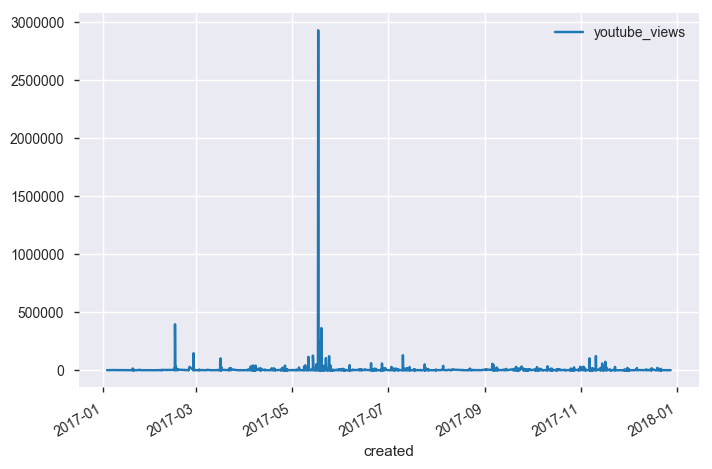

In [122]:
plot_data_set.plot(x='created');

### Youtube Likes <a class="anchor" id="youtube-likes"></a>

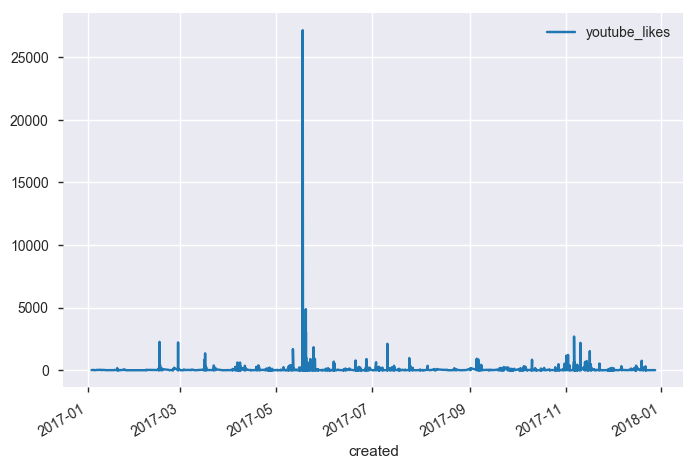

In [123]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'youtube_likes': data_set.youtube_like_count,
})
plot_data_set.plot(x='created');

### Youtube Dislikes <a class="anchor" id="youtube-dislikes"></a>

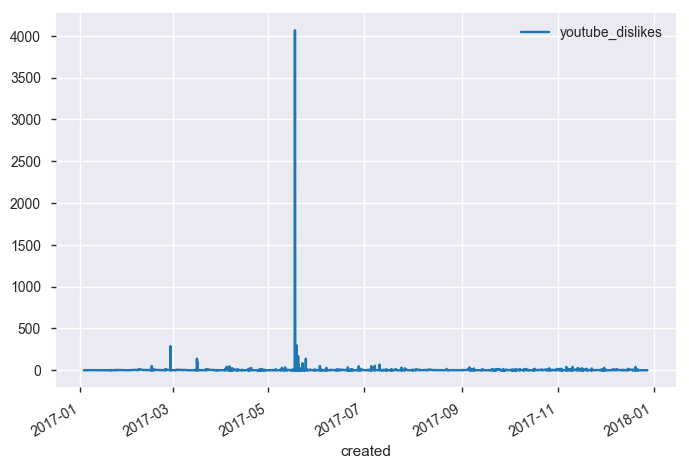

In [124]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'youtube_dislikes': data_set.youtube_dislike_count,
})
plot_data_set.plot(x='created');

### Youtube Favorites <a class="anchor" id="youtube-favorites"></a>

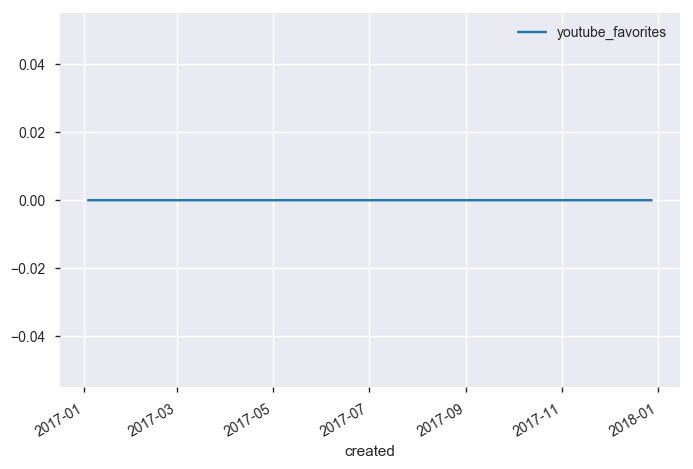

In [125]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'youtube_favorites': data_set.youtube_favorite_count,
})
plot_data_set.plot(x='created');

## Statistics Analysis <a class="anchor" id="statistics-analysis"></a>

### Views <a class="anchor" id="views"></a>

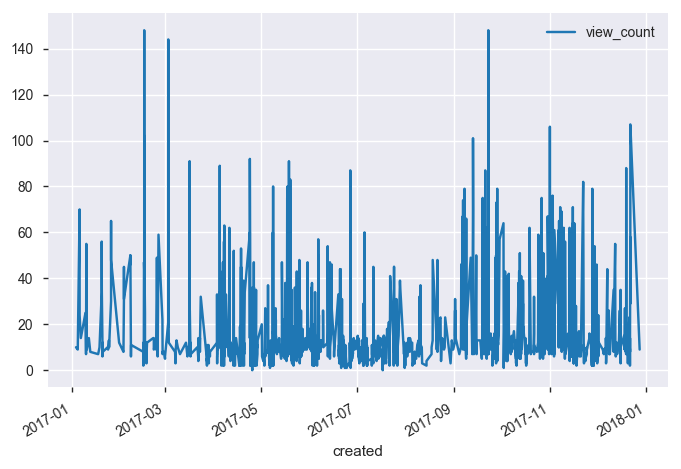

In [126]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'view_count': data_set.view_count,
})
plot_data_set.plot(x='created');

### Likes <a class="anchor" id="likes"></a>

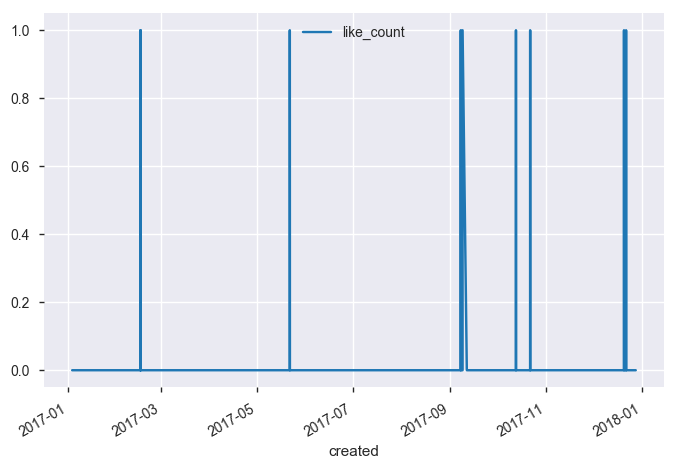

In [127]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'like_count': data_set.like_count,
})
plot_data_set.plot(x='created');

### Dislikes <a class="anchor" id="dislikes"></a>

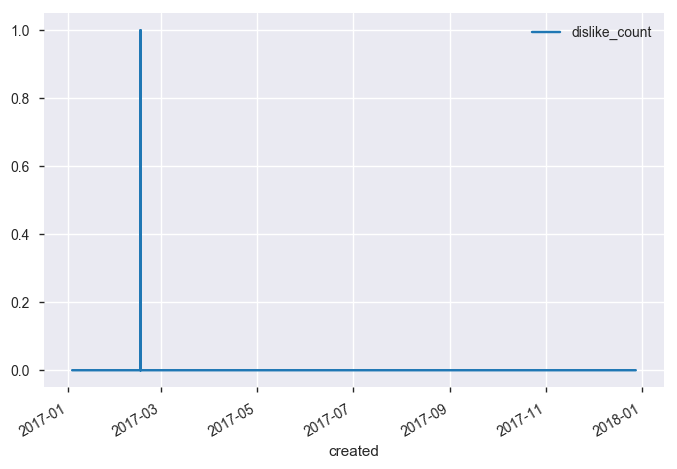

In [128]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'dislike_count': data_set.dislike_count,
})
plot_data_set.plot(x='created');

### Favorites <a class="anchor" id="favorites"></a>

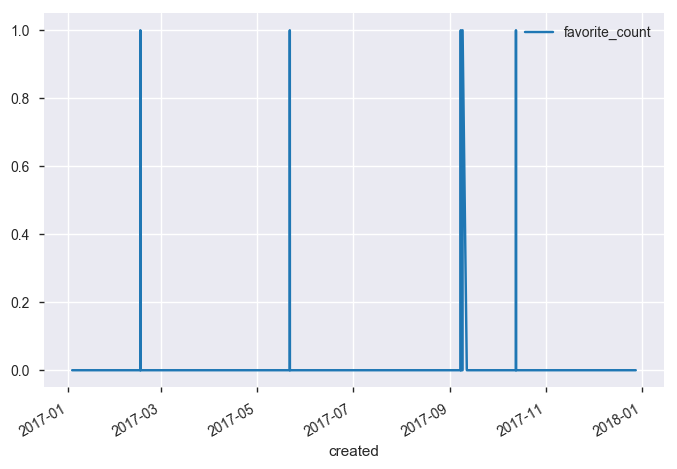

In [129]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'favorite_count': data_set.favorite_count,
})
plot_data_set.plot(x='created');

## Youtube Statistics Histograms <a class="anchor" id="youtube-statistics-histograms"></a>

A histogram is an accurate graphical representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable (quantitative variable).

Basically, histograms are used to represent data given in form of some groups. X-axis is about bin ranges where Y-axis talks about frequency.

### Youtube Views Histogram <a class="anchor" id="youtube-views-histogram"></a>

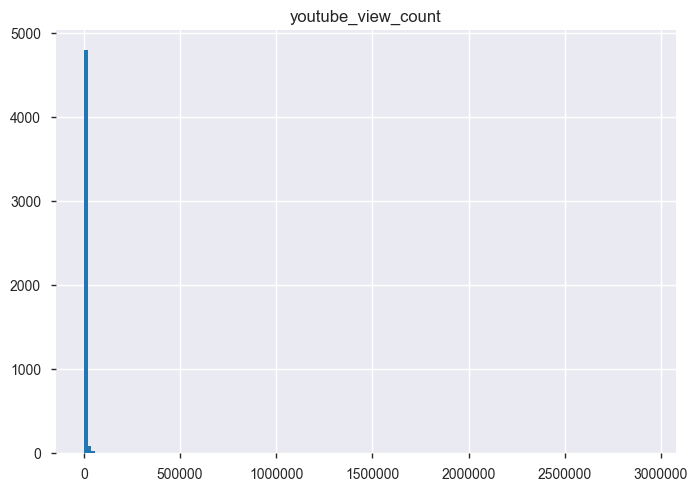

In [130]:
plot_data_set = pd.DataFrame({'youtube_view_count': data_set.youtube_view_count}, columns=['youtube_view_count'])
plot_data_set.hist(bins=150);

### Youtube Like Histogram <a class="anchor" id="youtube-likes-histogram"></a>

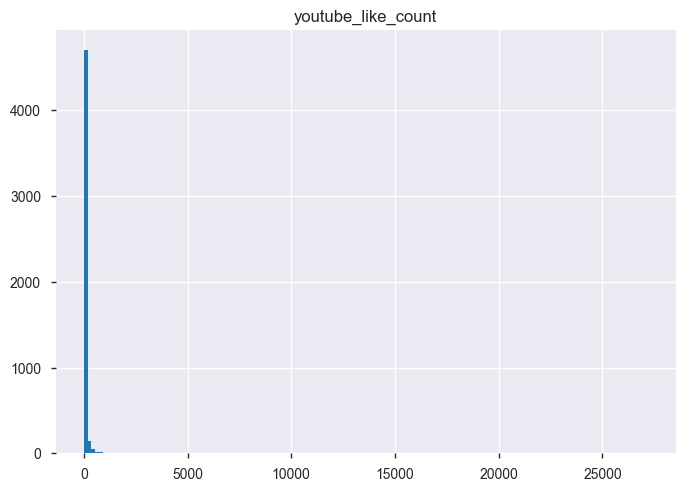

In [131]:
plot_data_set = pd.DataFrame({'youtube_like_count': data_set.youtube_like_count}, columns=['youtube_like_count'])
plot_data_set.hist(bins=150);

### Youtube Dislike Histogram <a class="anchor" id="youtube-dislikes-histogram"></a>

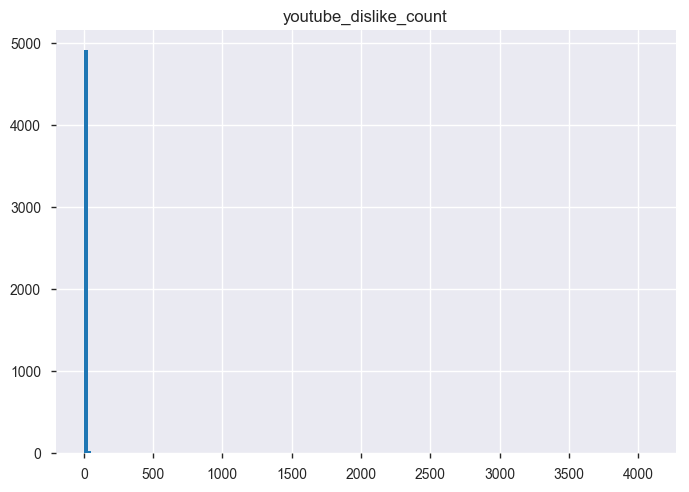

In [132]:
plot_data_set = pd.DataFrame({'youtube_dislike_count': data_set.youtube_dislike_count}, columns=['youtube_dislike_count'])
plot_data_set.hist(bins=150);

### Youtube Favorite Histogram <a class="anchor" id="youtube-favorites-histogram"></a>

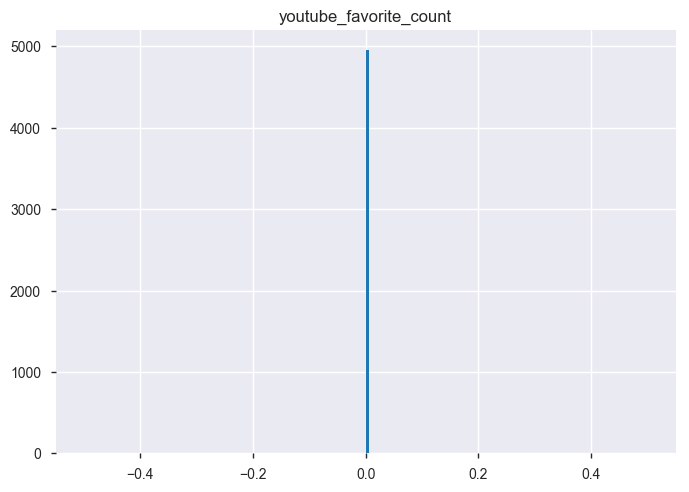

In [133]:
plot_data_set = pd.DataFrame({'youtube_favorite_count': data_set.youtube_favorite_count}, columns=['youtube_favorite_count'])
plot_data_set.hist(bins=150);

## Statistics Histograms <a class="anchor" id="statistics-histogram"></a>

### View Histogram <a class="anchor" id="views-histogram"></a>

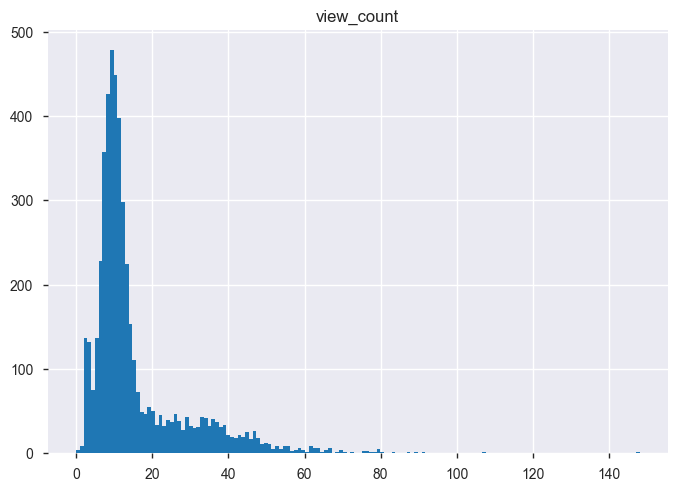

In [134]:
plot_data_set = pd.DataFrame({'view_count': data_set.view_count}, columns=['view_count'])
plot_data_set.hist(bins=150);

### Likes Histogram <a class="anchor" id="likes-histogram"></a>

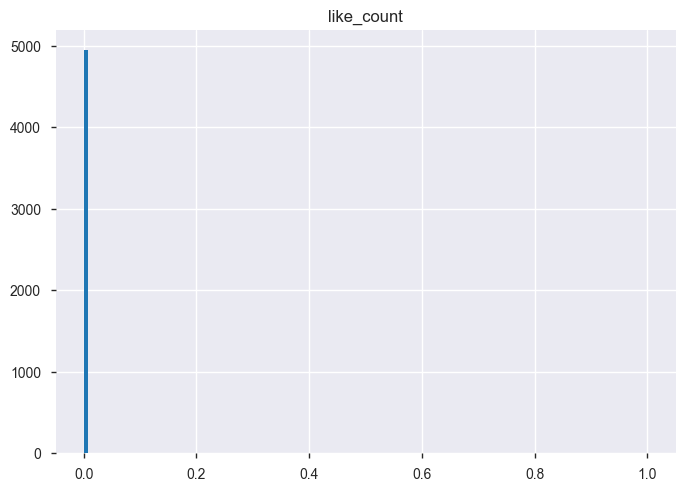

In [135]:
plot_data_set = pd.DataFrame({'like_count': data_set.like_count}, columns=['like_count'])
plot_data_set.hist(bins=150);

### Dislikes Histogram <a class="anchor" id="dislikes-histogram"></a>

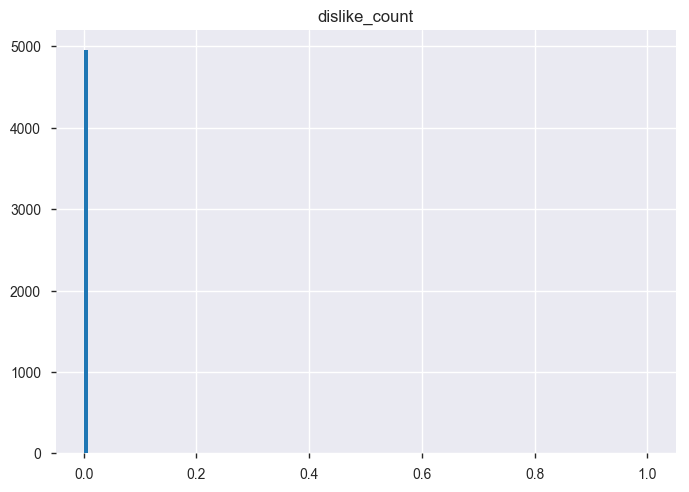

In [136]:
plot_data_set = pd.DataFrame({'dislike_count': data_set.dislike_count}, columns=['dislike_count'])
plot_data_set.hist(bins=150);

### Favorites Histogram <a class="anchor" id="favorites-histogram"></a>

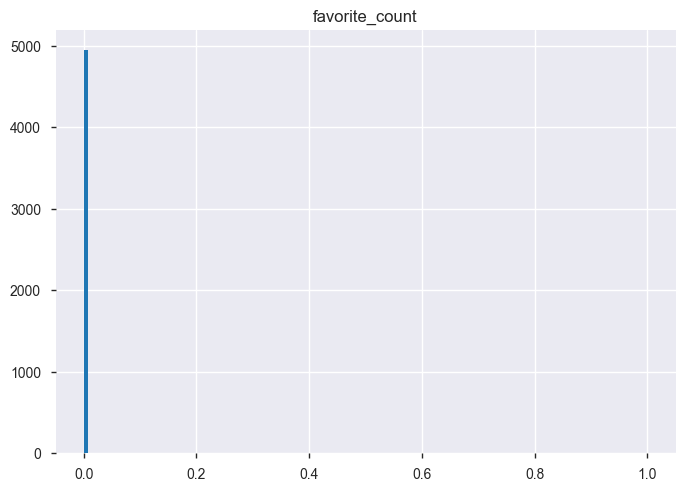

In [137]:
plot_data_set = pd.DataFrame({'favorite_count': data_set.favorite_count}, columns=['favorite_count'])
plot_data_set.hist(bins=150);